<a href="https://colab.research.google.com/github/Nao9910/k-means/blob/main/k_means%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

先頭列と先頭行がindexの状態のものを読み込む。
（コンマ付きでも可）

入力と出力はExcelで開くことができるSHIFT-JISを想定。
クラスター数はclister_numに自然数を入力。

「ランタイム」→「すべてのセルを実行」で、終わったら左のファイルから
- 「class_all.csv」（インポートされたファイルの一番右の列にクラスター番号を付加）
- 「class_list.csv」（クラスター番号のみ出力）
- 「class_average.csv」（各クラスターの平均値を出力）

をダウンロード。

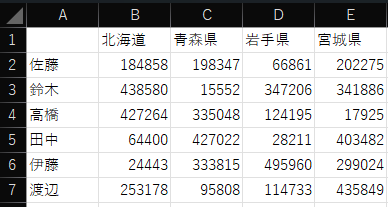

In [ ]:
# すでに同名のファイルが読み込まれている場合は削除
import os
if "file_name" in locals():
  os.remove("/content/"+str(file_name))
  print("file removed")
else:
  pass

# CSV読み込み
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

Saving 投入用.csv to 投入用.csv


In [ ]:
# クラスター数の設定、直接入力か右に入力
cluster_num = 0 #@param {type:"integer"}

In [ ]:
# ライブラリのインポート
import pandas as pd
from sklearn.cluster import KMeans

# データの読み込み
df = pd.read_csv( file_name , encoding="SHIFT-JIS", thousands=',', index_col=0)

# KMeans法の実行
clu = KMeans(n_clusters= cluster_num)
df["class"] = clu.fit_predict(df)
df=df.replace({'class': {0: int(cluster_num)}}) #1スタートにする
print(df)

# クラス分け結果の出力 class_all.csv
df.to_csv ( 'class_all.csv' , encoding="SHIFT-JIS")

# クラス分け結果のみ出力 class_list.csv
df["class"].to_csv ( 'class_list.csv' , encoding="SHIFT-JIS")

# 各グループの平均値 class_average.csv
print('各グループの平均値')
print(df.groupby('class').mean())
a=df.groupby('class').mean()
a.to_csv('class_average.csv',encoding="SHIFT-JIS")

NameError: ignored

In [ ]:
# 各クラスターのデータ数
for num in range(1,cluster_num+1):
  sum=(df['class'] == num).sum()
  print(f'{num}:{sum}')

NameError: ignored

In [ ]:
# df.groupby("class").count()